In [1]:
import numpy as np, matplotlib.pyplot as plt, pysynphot as S
from astropy.io import fits
import astropy.units as u, astropy.constants as c
%matplotlib inline

In [2]:
wr_bb = S.BlackBody(5e4).renorm(10,'vegamag',S.ObsBandpass('johnson,v'))
O_star = S.Icat('k93models', 3e4, 0, 4.3).renorm(10,'vegamag',S.ObsBandpass('johnson,v'))

In [3]:
he_fwhm = (1000.0 * u.km/u.s)
he_fwhm_a = (he_fwhm / c.c).to(u.dimensionless_unscaled)*4686*u.angstrom

In [4]:
he_ii = S.GaussianSource(center=4686,flux=1e-9,fluxunits='flam',fwhm=he_fwhm_a.value)

In [5]:
wr_spec = wr_bb + he_ii
wr_spec.convert('flam')

(4000, 8000)

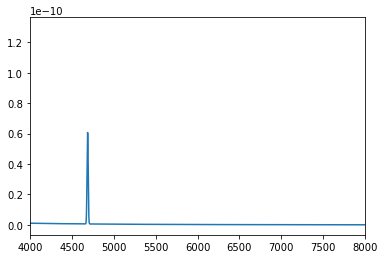

In [6]:
plt.plot(wr_spec.wave,wr_spec.flux)
plt.xlim(4000,8000)

In [7]:
on_filt = S.Box(4686,60) * 0.75
off_filt = S.Box(4750,100) * 0.75

In [8]:
wr_on = S.Observation(wr_bb,on_filt)
wr_off = S.Observation(wr_bb,off_filt)

O_on = S.Observation(O_star,on_filt)
O_off = S.Observation(O_star,off_filt)

((<pysynphot.spectrum.Box object at 0x1162e14e0> * 0.75)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((<pysynphot.spectrum.Box object at 0x1162e14a8> * 0.75)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((<pysynphot.spectrum.Box object at 0x1162e14e0> * 0.75)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((<pysynphot.spectrum.Box object at 0x1162e14a8> * 0.75)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [9]:
print(wr_on.effstim('vegamag'), wr_off.effstim('vegamag'), O_on.effstim('vegamag'), O_off.effstim('vegamag'))

9.890706029847284 9.89435764028075 9.902247076379787 9.894381853980772


In [10]:
#Well... let's try it with 30 second exposures and see how we do!!